## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('data/diabetes.csv')

print("✓ Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

✓ Dataset loaded successfully!

Dataset shape: (768, 9)
Rows: 768
Columns: 9


## View First Five Rows

In [3]:
# Display first 5 rows
print("First 5 rows of the dataset:\n")
df.head()

First 5 rows of the dataset:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## View all column names

In [4]:
# Show all column names
print("Column names:")
print(df.columns.tolist())

Column names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


## Dataset Basic Information

In [5]:
# Get dataset info
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Statistical Summary

In [6]:
# Statistical summary
print("Statistical Summary:\n")
df.describe()

Statistical Summary:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Check for missing values

In [7]:
# Check missing values
print("Missing Values:\n")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total missing values: 0


## Check Class Distribution

In [8]:
# Check target variable distribution
print("Class Distribution:")
print(df['Outcome'].value_counts())
print("\nPercentage:")
print(df['Outcome'].value_counts(normalize=True) * 100)

Class Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


## Visualize class distribution

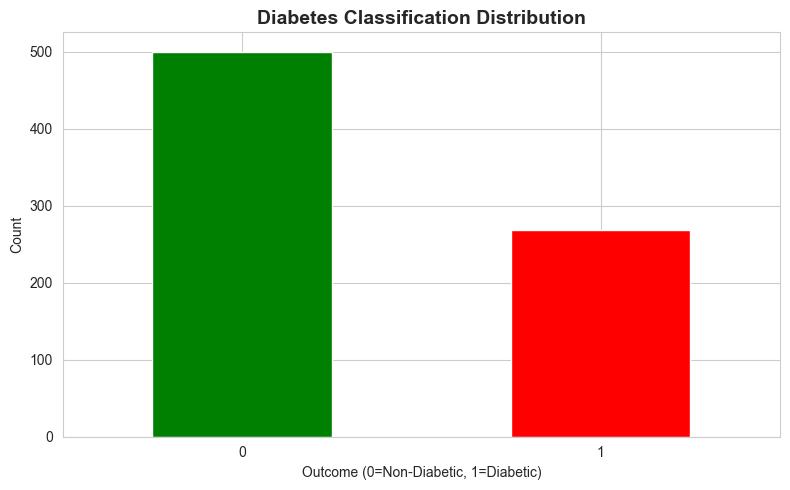

✓ Plot saved to: results/class_distribution.png


In [9]:
# Plot class distribution
plt.figure(figsize=(8, 5))
df['Outcome'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Diabetes Classification Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Outcome (0=Non-Diabetic, 1=Diabetic)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot
plt.savefig('results/class_distribution.png')
plt.show()

print("✓ Plot saved to: results/class_distribution.png")

## Check for zero values

In [10]:
# Check for impossible zero values
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Zero Values in Key Columns:")
print("-" * 50)
for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    print(f"{col:20s}: {zero_count:3d} zeros ({zero_pct:5.2f}%)")
    

Zero Values in Key Columns:
--------------------------------------------------
Glucose             :   5 zeros ( 0.65%)
BloodPressure       :  35 zeros ( 4.56%)
SkinThickness       : 227 zeros (29.56%)
Insulin             : 374 zeros (48.70%)
BMI                 :  11 zeros ( 1.43%)


## Correlation Analysis

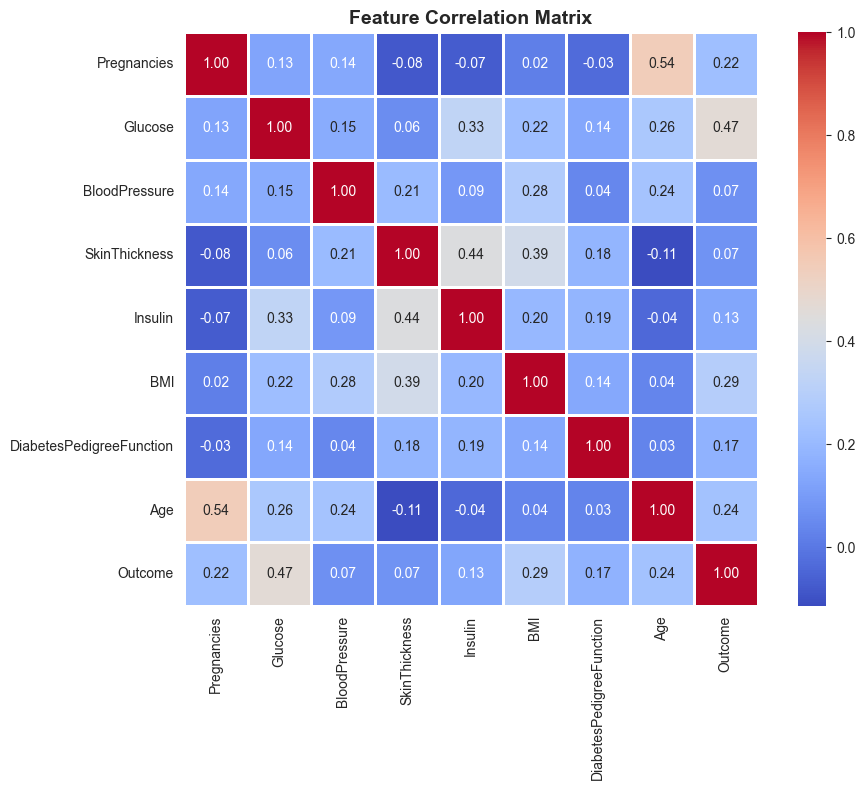

✓ Plot saved to: results/correlation_matrix.png


In [11]:
# Calculate correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()

# Save the plot
plt.savefig('results/correlation_matrix.png')
plt.show()

print("✓ Plot saved to: results/correlation_matrix.png")

## Summary

In [13]:
print("=" * 60)
print("DATA EXPLORATION SUMMARY")
print("=" * 60)
print(f"\n✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"✓ Target variable: Outcome (0=Non-Diabetic, 1=Diabetic)")
print(f"✓ Missing values: {df.isnull().sum().sum()}")
print(f"✓ Diabetic cases: {df['Outcome'].sum()} ({df['Outcome'].mean()*100:.1f}%)")
print(f"✓ Non-diabetic cases: {(df['Outcome']==0).sum()} ({(1-df['Outcome'].mean())*100:.1f}%)")
print(f"\n✓ Visualizations saved to results/ folder")

DATA EXPLORATION SUMMARY

✓ Dataset loaded: 768 rows, 9 columns
✓ Target variable: Outcome (0=Non-Diabetic, 1=Diabetic)
✓ Missing values: 0
✓ Diabetic cases: 268 (34.9%)
✓ Non-diabetic cases: 500 (65.1%)

✓ Visualizations saved to results/ folder
